# IceCube Video Games Analysis

<div style="border: 2px solid black; padding: 10px; margin: 10px">

In this project we're identifying the patterns that indicate the success of a game to better formulate advertising campaigns.

</div>

## Games EDA

### Initialization

In [7]:
# Importing required packages.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # type: ignore
import plotly.express as px
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


In [8]:
# Loading data.

games = pd.read_csv('games.csv')

### Games Dataset Overview

In [10]:
# General visual overview

games

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Data Preparation

<div style="border: 2px solid black; padding: 10px; margin: 10px">

- Capital letters in column titles
- Check for duplicate rows
- Check for missing values (fill and/or drop values or rows)
- Need to change dtype: **year_of_release** & **user_score**

</div>

#### Column Formatting

In [17]:
# Column formatting.
# Printed columns for initial validation no presence of unwanted spaces at beginning or end of column titles

# Converting all column names to lowercase
games.columns = games.columns.str.lower()

# Printing columns to validate changes
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Duplicates

In [19]:
# Checking for duplicated rows in 'games'.

games.duplicated().sum()
# No duplicate rows

0

#### Missing Values

In [21]:
# Checking for missing values.

games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div style="border: 2px solid black; padding: 10px; margin: 10px">

We're seeing only two missing values in the **'name'** and **'genre'** columns. We will fill these values with **'Unknown'**.

For **'critic_score', 'user_score'** and **'rating'**, there are quite a few missing values; around 40-50% of total data. Removing these would greatly decrease the accuracy of our data. We will convert all missing values for 'critic_score' and 'user_score' to '0'. For 'rating', we will convert to 'NR' for "Not Rated" (these values will retain the 'object' data type). 

For **'year_of_release'**, there are 269 missing values. For this analysis, we will remove these rows.

These values could be missing due to not having the data available at the time of exporting the data. It could also be that the values are truly unknown and not able to be included in this data.

</div>

##### Filling Missing Values

In [25]:
# Filling missing values.

games['name'] = games['name'].fillna('Unknown')
games['genre'] = games['genre'].fillna('Unknown')
games['critic_score'] = games['critic_score'].fillna(0)
games['user_score'] = games['user_score'].fillna(0)
games['rating'] = games['rating'].fillna('NR')

##### Dropping Rows

In [27]:
# Dropping rows with missing values from 'year_of_release'.

games.dropna(subset=['year_of_release'], inplace=True)

# Resetting index after dropping rows.
games.reset_index()

index                           name platform  year_of_release  \
0          0                     Wii Sports      Wii           2006.0   
1          1              Super Mario Bros.      NES           1985.0   
2          2                 Mario Kart Wii      Wii           2008.0   
3          3              Wii Sports Resort      Wii           2009.0   
4          4       Pokemon Red/Pokemon Blue       GB           1996.0   
...      ...                            ...      ...              ...   
16441  16710  Samurai Warriors: Sanada Maru      PS3           2016.0   
16442  16711               LMA Manager 2007     X360           2006.0   
16443  16712        Haitaka no Psychedelica      PSV           2016.0   
16444  16713               Spirits & Spells      GBA           2003.0   
16445  16714            Winning Post 8 2016      PSV           2016.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0            Sports     41.36     28.96      3.77         8.45          76.0   
1          Platform     29.08      3.58      6.81         0.77           0.0   
2            Racing     15.68     12.76      3.79         3.29          82.0   
3            Sports     15.61     10.93      3.28         2.95          80.0   
4      Role-Playing     11.27      8.89     10.22         1.00           0.0   
...             ...       ...       ...       ...          ...           ...   
16441        Action      0.00      0.00      0.01         0.00           0.0   
16442        Sports      0.00      0.01      0.00         0.00           0.0   
16443     Adventure      0.00      0.00      0.01         0.00           0.0   
16444      Platform      0.01      0.00      0.00         0.00           0.0   
16445    Simulation      0.00      0.00      0.01         0.00           0.0   

      user_score rating  
0              8      E  
1              0     NR  
2            8.3      E  
3              8      E  
4              0     NR  
...          ...    ...  
16441          0     NR  
16442          0     NR  
16443          0     NR  
16444          0     NR  
16445          0     NR  

[16446 rows x 12 columns]

##### Validating Values Count

In [29]:
# Validating no more missing values.

games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

##### Data Types

In [31]:
# Changing data types.

# Years formatted as int64 format instead of float64
games['year_of_release'] = games['year_of_release'].astype(int)

# User Score changing to float64
# Encountered 'tbd' value in 'user_score' column
# Replacing this value with '0', and converting column
games['user_score'] = games['user_score'].replace(to_replace='tbd', value=0)
games['user_score'] = games['user_score'].astype(float)

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Here, we're replacing 'tbd' with '0' because we're seeing this data and analyzing it from a specific viewpoint as one instance. <br>
If, in the future, the data becomes available we can include it in this analysis, but for now we will count is as a '0' score.

</div>

##### Validating Dtypes

In [34]:
# Validating dtypes conversion complete.

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Adding Total Sales Column

In [36]:
# Adding together 'na_sales', 'eu_sales', 'jp_sales', and 'other_sales' to create a 'tota_sales' column.

total_sales = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games.insert(8, 'total_sales', total_sales)

#### Validating Added Column

In [38]:
# Validating column creation.

games

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  total_sales  critic_score  \
0         41.36     28.96      3.77         8.45        82.54          76.0   
1         29.08      3.58      6.81         0.77        40.24           0.0   
2         15.68     12.76      3.79         3.29        35.52          82.0   
3         15.61     10.93      3.28         2.95        32.77          80.0   
4         11.27      8.89     10.22         1.00        31.38           0.0   
...         ...       ...       ...          ...          ...           ...   
16710      0.00      0.00      0.01         0.00         0.01           0.0   
16711      0.00      0.01      0.00         0.00         0.01           0.0   
16712      0.00      0.00      0.01         0.00         0.01           0.0   
16713      0.01      0.00      0.00         0.00         0.01           0.0   
16714      0.00      0.00      0.01         0.00         0.01           0.0   

       user_score rating  
0             8.0      E  
1             0.0     NR  
2             8.3      E  
3             8.0      E  
4             0.0     NR  
...           ...    ...  
16710         0.0     NR  
16711         0.0     NR  
16712         0.0     NR  
16713         0.0     NR  
16714         0.0     NR  

[16446 rows x 12 columns]

## Analysis

### Games Released by Year

<div style="border: 2px solid black; padding: 10px; margin: 10px">

Yearly releases began increasing around 1992-1993 and increased until a peak around 2008-2009 and then slowly declined afterwards.<br>
We are interested in why this increase occurred, and why did it decline shortly after?<br>
It seems like a plateau was reached from 2012-2016, what caused this to happen?

</div>

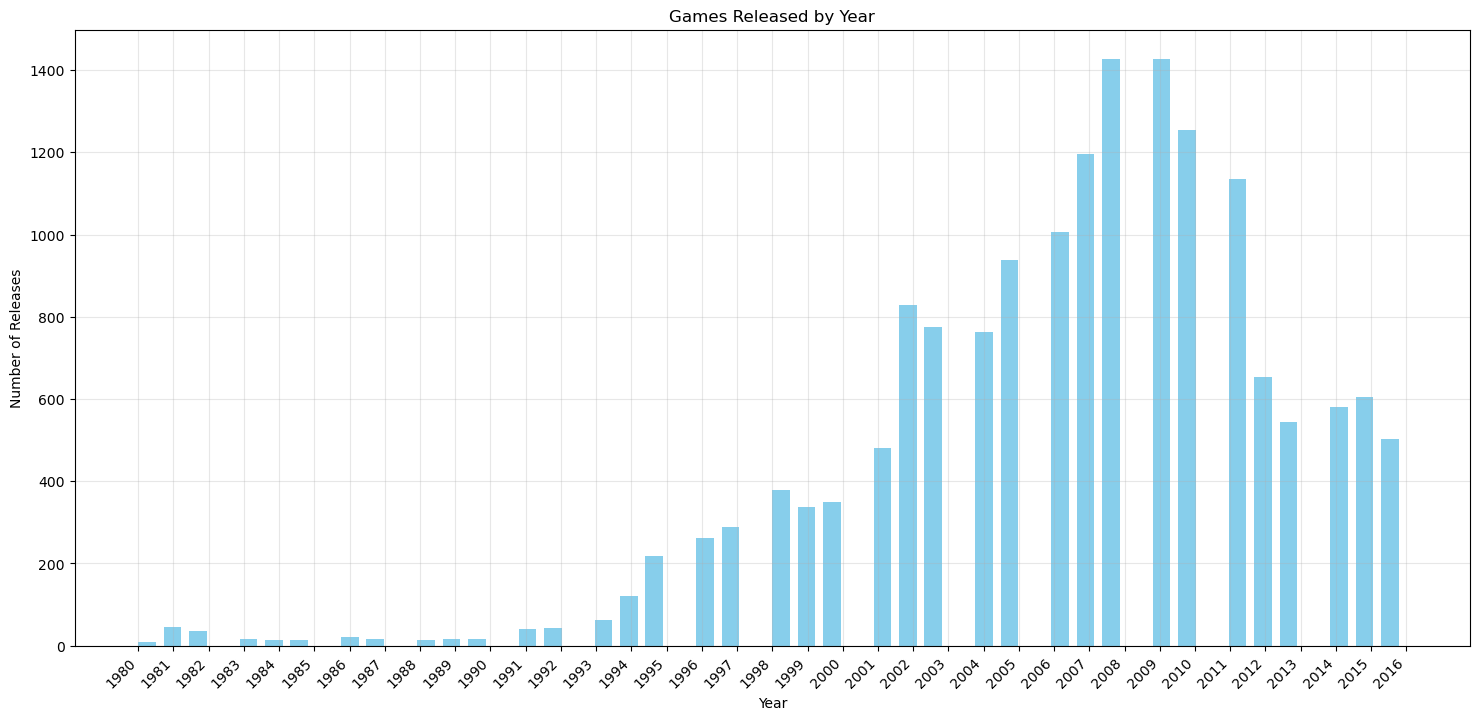

In [43]:
# Creating a histogram using pandas.

games.hist(column='year_of_release', 
           bins=50, 
           color='skyblue',
           figsize=(18, 8),
           width=0.5)
plt.title('Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(axis='both', alpha=0.3)

year_ticks = np.arange(games['year_of_release'].min(), games['year_of_release'].max() + 1, 1)
plt.xticks(year_ticks, rotation=45, ha='right')

# How can I effectively add the values to the tops of the bars?
# I've been trying with this, but 
# plt.bar_label(games['year_of_release'], fontsize=10, color='navy')

plt.show()

### Total Sales by Platform

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The Wii platform has over twice as many sales as the rest of the platforms in this time period. <br> 
Coming up in second place is Nintendo (NES), followed by a close 3rd place with GameBoy (GB) and Nintendo DS.

</div>

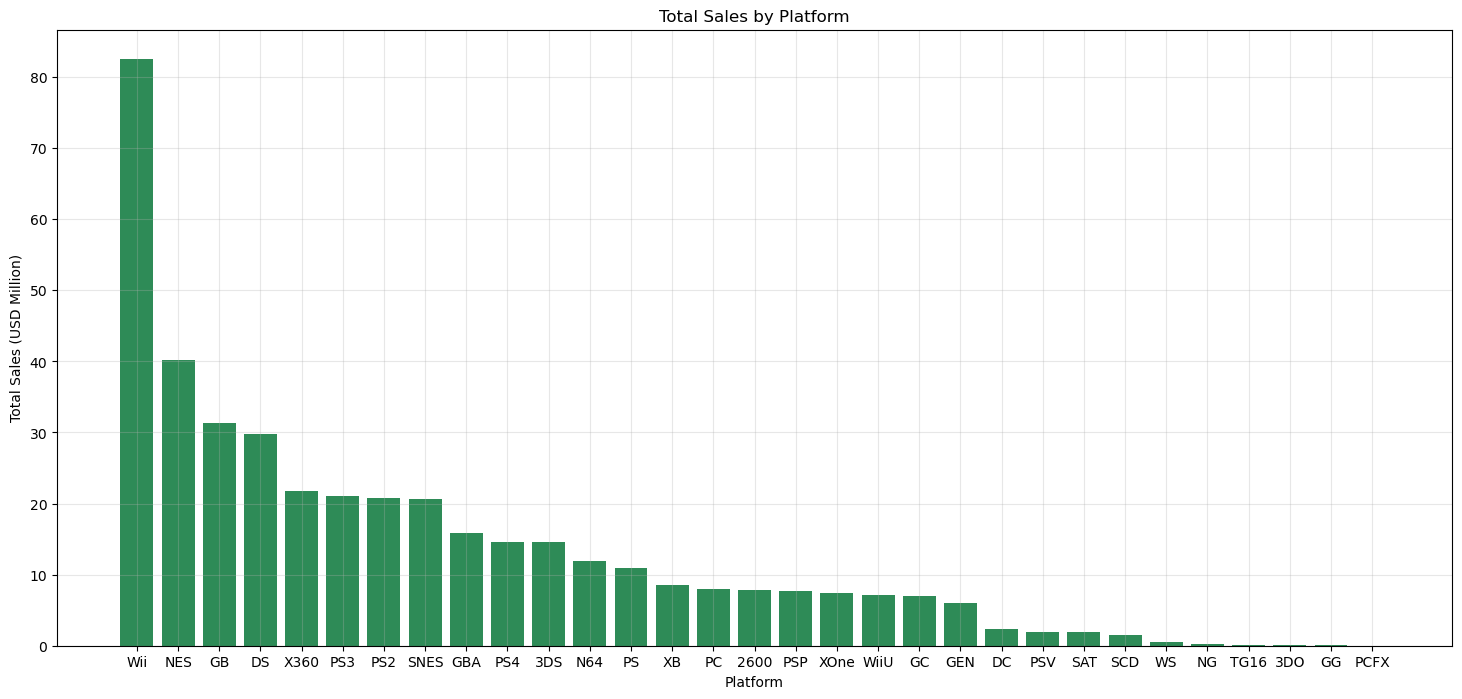

In [46]:
# Bar Chart displaying sales by each platform.

cats = games['platform']
vals = games['total_sales']

plt.figure(figsize=(18, 8))
plt.bar(cats, vals, color='seagreen')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)

plt.show()

### Top 5 Platforms: Sales

<div style="border: 2px solid black; padding: 10px; margin: 10px">

As we look at Yearly Sales by the Top 5 Platforms we're able to see patterns of higher and lower sales. <br>
NES and GB were most prominent from the 1980's to early 2000's and then not at all after 2004. <br>
Later, we see the DS platform start strong at the beginning of 2005 and then slowly die out into the early 2010's. <br>
For the Wii, sales started strong and peaked around 2008-2009 and then quickly declined. <br>
For the X360, we're seeing a slower start in the early 2000's, a peak around 2010-2011 and then a slower decline afterwards. <br><br>

Later analysis will explore the relationships between what games were released at moments where sales were growing, and what <br>
happened after the decline began.

</div>

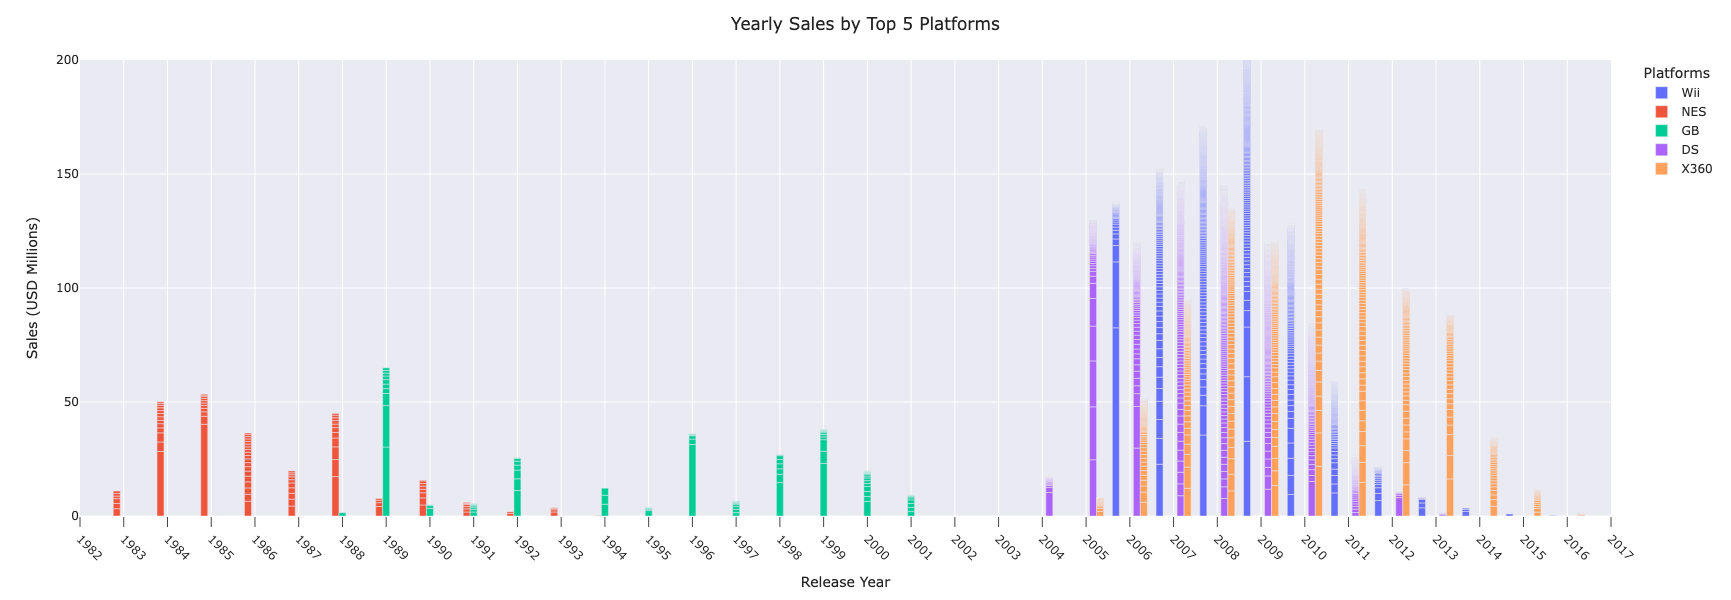

In [49]:
# Comparing the Top 5 Platforms with the most sales distributed by year.

# Creating a separate df with only the Top 5 Platforms: Wii, NES, GB, DS, X360
# Specifying the platforms we want
t5_sales_platforms = ['Wii', 'NES', 'GB', 'DS', 'X360']

# Running a query to extract the rows with the specified platforms into new df
games_top5sales = games.query("platform in @t5_sales_platforms")[['platform', 'year_of_release', 'total_sales']]

# Creating a Bar Chart with the Top 5 Platforms
fig = px.bar(games_top5sales, 
             x='year_of_release', 
             y='total_sales', 
             color='platform', 
             barmode='group',
             labels={
        'year_of_release': 'Release Year',
        'total_sales': 'Sales (USD Millions)',
        'platform': 'Platforms'
    }
)

fig.update_layout(
    width = 950,
    height = 600,
    template = 'seaborn',
    yaxis_range=[0, 200],
    xaxis_range=[1982, 2017],
    title={
        'text': 'Yearly Sales by Top 5 Platforms',
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig.update_xaxes(
    nticks = 40,
    tickangle = 45,
    ticks = 'outside',
    ticklen = 10
)

fig.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

For NES and GB, they no longer have sales in the later years of the data. <br>
NES had about a 10-year stretch of sales before it died away (1982-1992). <br>
GB had a little longer stretch (13 years), but still completely died out around 2001 (1988-2001).<br><br>

<u>Here are the years that a platform produced sales:</u>
* Wii - **9yrs** (2004 - 2013)
* NES - **10yrs** (1982 - 1992)
* GB - **13yrs** (1988 - 2001)
* DS - **9yrs** (2004 - 2013)
* X360 - **11yrs** (2005 - 2016)
<br>

Since we're focusing on a prognosis for 2017, we'll focus on the data from 2010 on to analyze more current patterns in the sales trends.

</div>

### Sales from 2010-2016

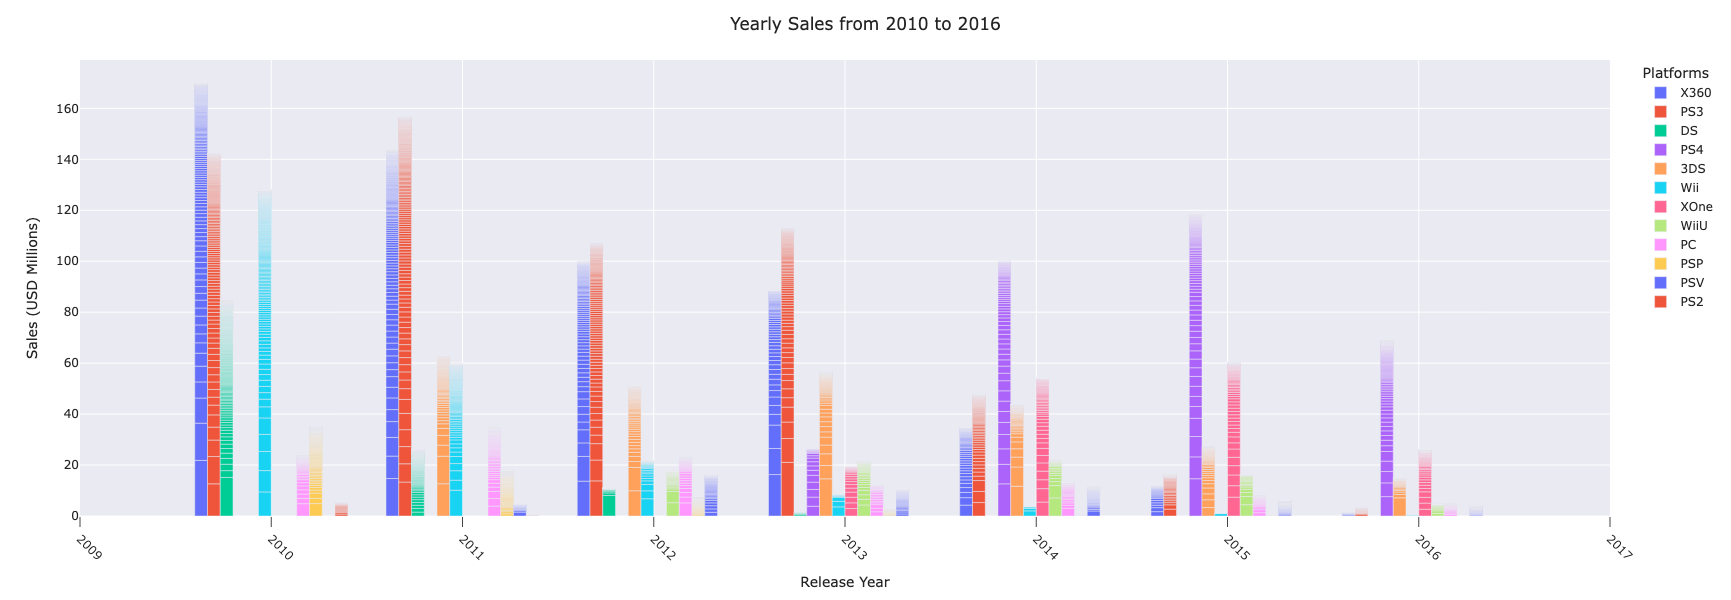

In [52]:
# Creating a new filtered df with data from 2010 on.

games_filtered = games[games['year_of_release'] >= 2010]

fig = px.bar(games_filtered, 
             x='year_of_release', 
             y='total_sales', 
             color='platform', 
             barmode='group',
             labels={
        'year_of_release': 'Release Year',
        'total_sales': 'Sales (USD Millions)',
        'platform': 'Platforms'
    }
)

fig.update_layout(
    width = 950,
    height = 600,
    template = 'seaborn',
    xaxis_range=[2009, 2017],
    title={
        'text': 'Yearly Sales from 2010 to 2016',
        'x': 0.5,
        'xanchor': 'center'
    }
)

fig.update_xaxes(
    nticks = 40,
    tickangle = 45,
    ticks = 'outside',
    ticklen = 10
)

fig.show()

<div style="border: 2px solid black; padding: 10px; margin: 10px">

From our data starting in 2010 to 2016, it appears that sales across all platforms decrease going into 2016. <br>
There are three that have significant sales the 3 years prior to 2016 (PS4, XOne, and WiiU). <br>
Further analysis of what could have caused their success during this time period could increase probability of success <br>
in our plan for sales in 2017.

</div>

### Boxplot Analysis for Global Sales

<div style="border: 2px solid black; padding: 10px; margin: 10px">

In our Boxplot analysis, we're seeing multiple outliers for each platform of games that performed extremely well outside of the typical performance for other games on the platform. We also see that with our more seniored platforms, their IQR is greater indicating higher variability in game performance in the marketplace. Newer platforms are seeing less variability but still some higher performance outliers in their distributions indicating high-sales potential on the platform.

As we look at the average global sales by platform, we see a relationship between a higher IQR and higher average sales by platform. Despite 'DS' having a quite high selling outlier in the "Sales by Platform" figure, it still has a smaller average of sales compared to the other platforms.

</div>

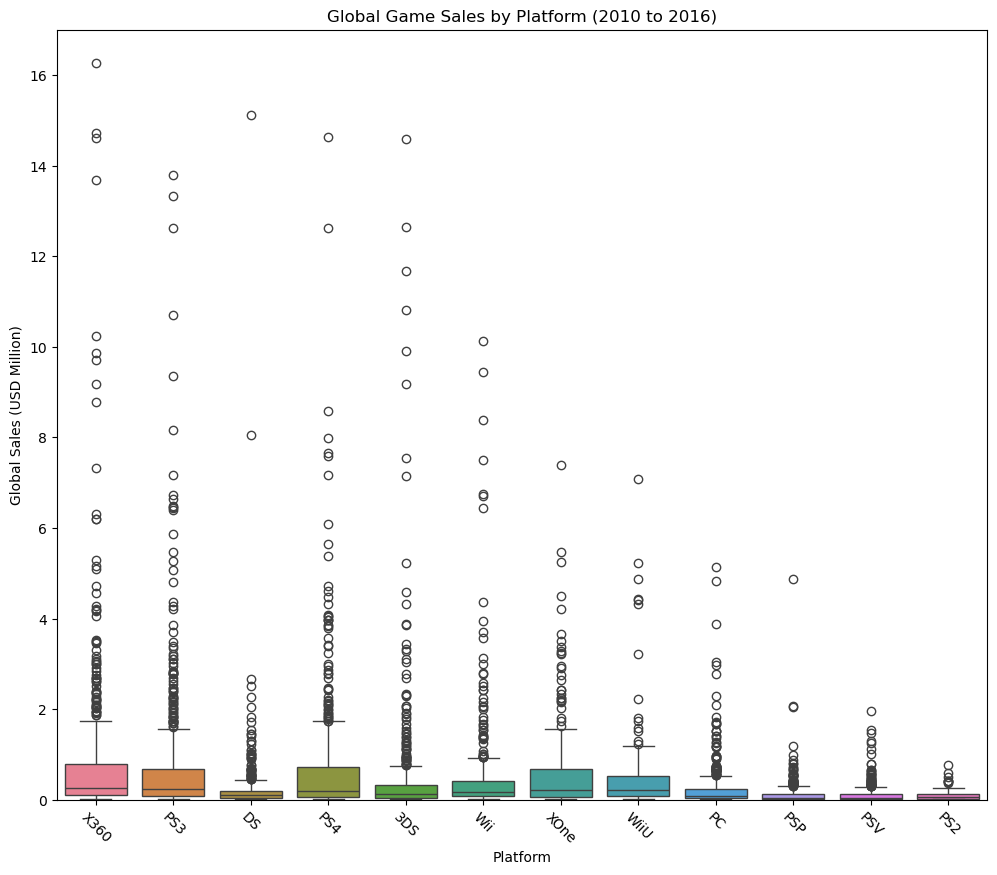

In [56]:
# Boxplot Analysis for Global Sales of all games, broken down by platform.

plt.figure(figsize=(12,10))

sns.boxplot(data=games_filtered, 
            x='platform',
            y='total_sales',
            hue='platform',
)

plt.xlabel('Platform')
plt.ylabel('Global Sales (USD Million)')
plt.title('Global Game Sales by Platform (2010 to 2016)')
plt.xticks(rotation=-45)
plt.ylim(0, 17)

plt.show()

### Average Sales by Platform

In [58]:
# Calculating averages sales by platform and creating new boxplots.

# Creating a new df containing grouped data for the average of total sales by platform
games_avgsales = games_filtered.groupby('platform')['total_sales'].mean().reset_index()

games_avgsales = games_avgsales.sort_values(by='total_sales', ascending=False).reset_index()

games_avgsales

index platform  total_sales
0      10     X360     0.809426
1       5      PS4     0.801378
2       4      PS3     0.661125
3      11     XOne     0.645020
4       9     WiiU     0.559116
5       0      3DS     0.503535
6       8      Wii     0.495489
7       2       PC     0.254614
8       1       DS     0.244083
9       3      PS2     0.135333
10      6      PSP     0.128100
11      7      PSV     0.125431

### Reviews Effect on Sales: X360

<div style="border: 2px solid black; padding: 10px; margin: 10px">

We can see there is a positive correlation between ratings and sales across all games on the X360 platform.<br>

We can see that, according to the correlation coefficients, that the Critic Scores are a higher indicator of game success than User Scores, although both are good indicators of positive performance on a particular game.

</div>

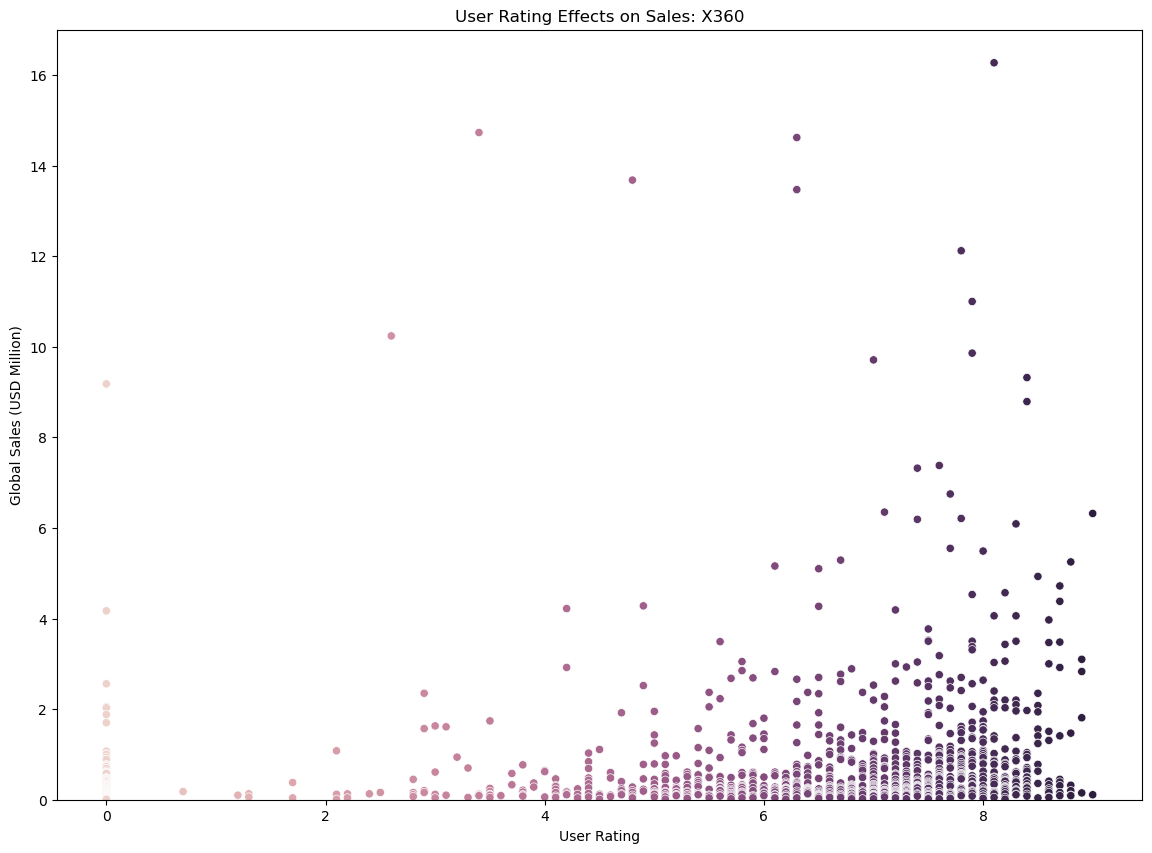

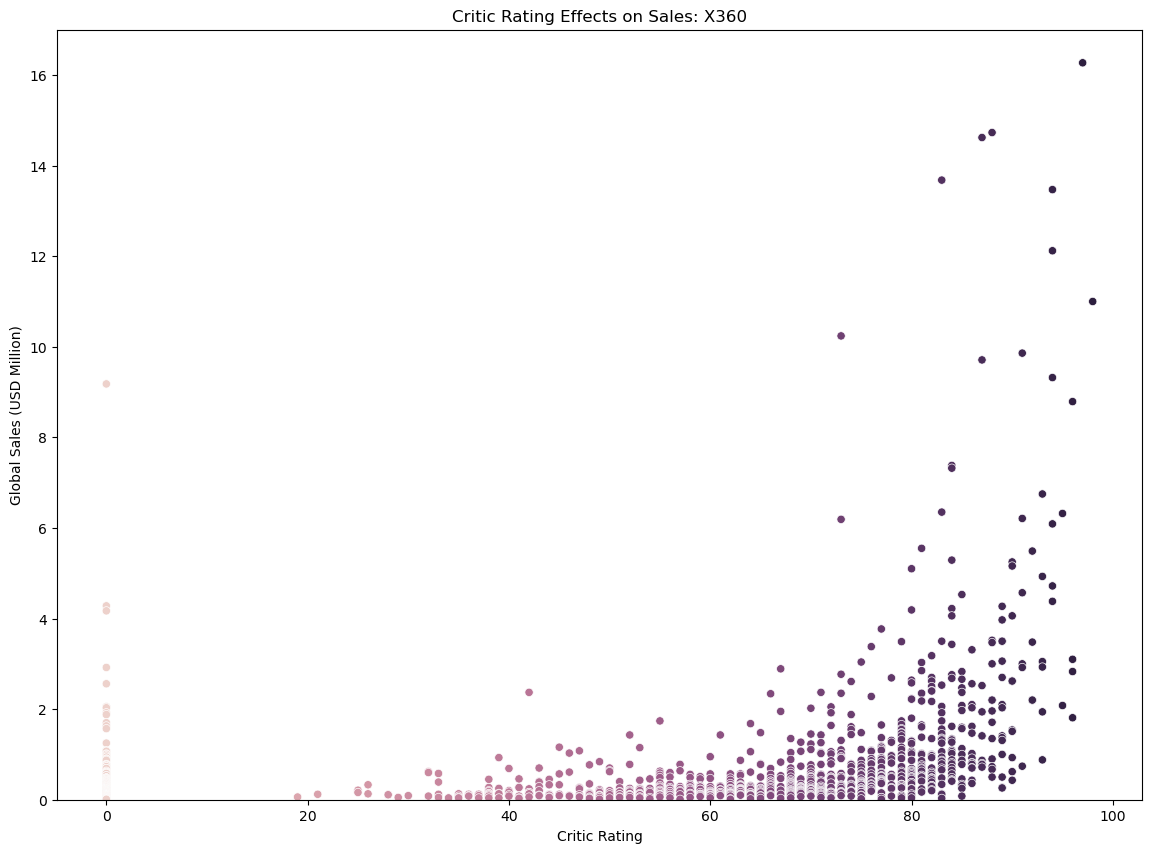

Correlation b/t User Score & Global Sales: PearsonRResult(statistic=0.20780580062906803, pvalue=1.7435999517745706e-13)
Correlation b/t Critic Score & Global Sales: PearsonRResult(statistic=0.3117562516201693, pvalue=3.556731004745923e-29)


In [61]:
# Scatter plot describing the relationship between reviews and sales for X360 platform.

# Filter data from original dataset to include only rows where platform is: X360
games_x360 = games[games['platform'] == 'X360']


# Scatterplot for User Scoring
plt.figure(figsize=(14,10))

sns.scatterplot(data=games_x360, 
            x='user_score',
            y='total_sales',
            hue='user_score',
            legend=False
            )

plt.xlabel('User Rating')
plt.ylabel('Global Sales (USD Million)')
plt.title('User Rating Effects on Sales: X360')
plt.ylim(0, 17)

plt.show()


# Scatterplot for Critic Scoring
plt.figure(figsize=(14,10))

sns.scatterplot(data=games_x360, 
            x='critic_score',
            y='total_sales',
            hue='critic_score',
            legend=False
            )

plt.xlabel('Critic Rating')
plt.ylabel('Global Sales (USD Million)')
plt.title('Critic Rating Effects on Sales: X360')
plt.ylim(0, 17)

plt.show()


# Correlation b/t User Score & Global Sales
user_corr = pearsonr(games_x360['user_score'], games_x360['total_sales'])
print(f'Correlation b/t User Score & Global Sales: {user_corr}')

# Correlation b/t Critic Score & Global Sales
critic_corr = pearsonr(games_x360['critic_score'], games_x360['total_sales'])
print(f'Correlation b/t Critic Score & Global Sales: {critic_corr}')

### Game Performance Across Platforms

<div style="border: 2px solid black; padding: 10px; margin: 10px">

When we look at the game performance by platform, we see that **Grand Slam Tennis 2** had the best performance for the year 2013. We can also see very good performance from the game **Cardfight!! Vanguard: Lock on Victory!!** from about 2011 to 2015! These games brought the most following and engagement among their competitors from 2010 to 2016.

</div>

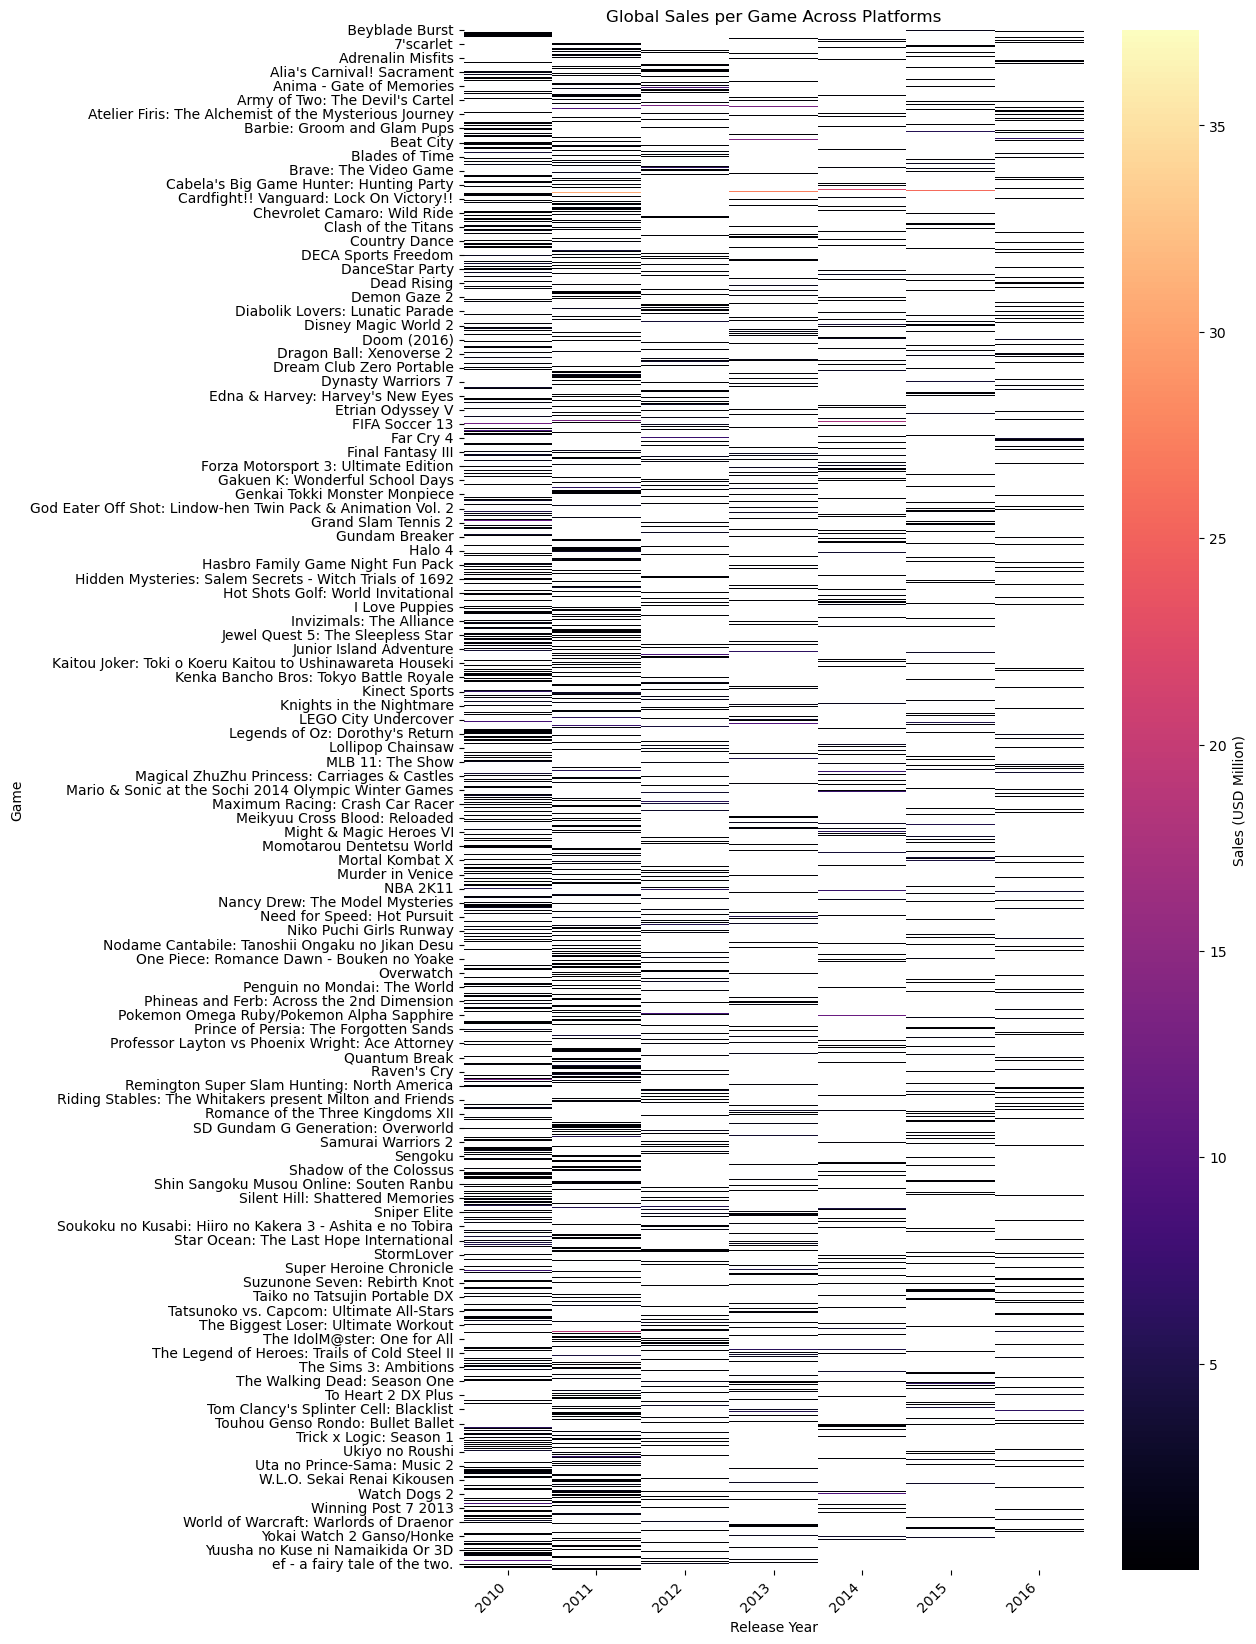

In [64]:
# Creating a new df containing all games associated with X360
# Then finding those same games across all other platforms

# Getting unique 'name' values from games_x360 df
games_x360_names = games_x360['name'].unique()

# Creating new df searching for those games across all platforms
games_acrossplats = games[games['name'].isin(games_x360_names)][['name', 'platform', 'year_of_release', 'genre', 'total_sales']]

# Filtering data further to include sales from 2010 to 2016
games_acrossplats = games[games['year_of_release'] >= 2010]

# Structuring data so each row is a game, columns are platforms, values are sales
games_apfs_pt = games_acrossplats.pivot_table(index='name',
                              columns='year_of_release',
                              values='total_sales',
                              aggfunc='sum'
)

# Creating a heatmap to illustrate game sales across platforms
plt.figure(figsize=(10,20))

sns.heatmap(data=games_apfs_pt,
            cmap='magma',
            cbar_kws={'label': 'Sales (USD Million)'},
)

plt.title('Global Sales per Game Across Platforms')
plt.xlabel('Release Year')
plt.ylabel('Game')
plt.xticks(rotation=45, ha='right')

plt.show()

### Distribution of Games by Genre

<div style="border: 2px solid black; padding: 10px; margin: 10px">

By Genre, we can see a clear preference for **Action** games followed by a following for **Shooter** games. The **Misc** and **Sports** genre games had a higher success rate in 2010 than shooting games that year, but every year afterwards the shooting games have the lead. **Action** and **Shooting** games are definitely the most profitable among the group.<br>

As for the lower performing genres, we're seeing that **Puzzle** and **Strategy** games are amongst the least preferred when it comes to video games. This could be for many reasons, but as a comparison to the higher performing games, **Puzzle** and **Strategy** games would require more planning and organization of thoughts to accomplish game objectives while **Action** and **Shooter** games are more straight-forward and faster reward.

</div>

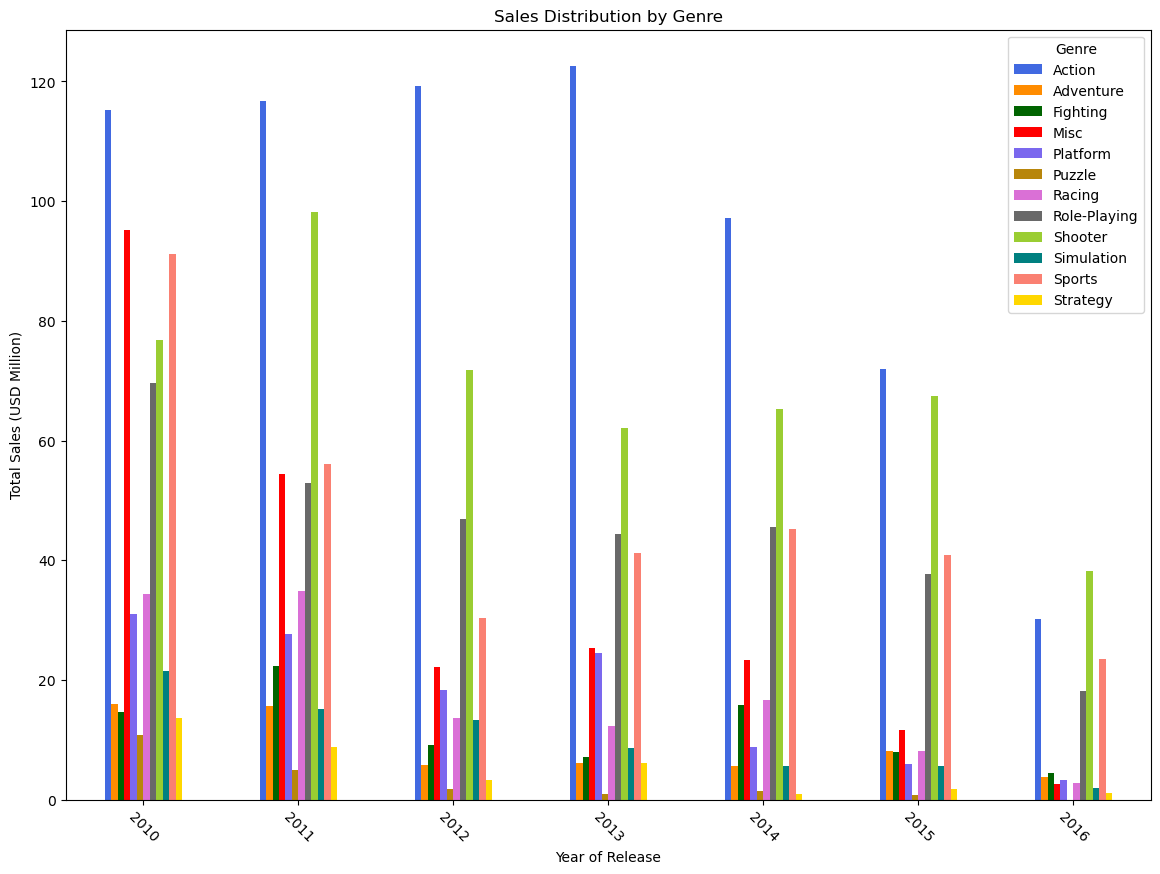

In [67]:
# Distribution of Games by Genre from 2010 to 2016

# Using the PivotTable from above to create a dataframe organizing data by Genre
games_apfs_pt2 = games_acrossplats.pivot_table(index='year_of_release',
                              columns='genre',
                              values='total_sales',
                              aggfunc='sum'
)

# Creating a Bar Chart to illustrate performance across genres
colors = ['royalblue', 'darkorange', 'darkgreen', 'r', 'mediumslateblue', 
          'darkgoldenrod', 'orchid', 'dimgrey', 'yellowgreen', 'teal', 'salmon', 'gold']

games_apfs_pt2.plot(kind='bar',
                    figsize=(14, 10),
                    color=colors
)

plt.title('Sales Distribution by Genre')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (USD Million)')
plt.xticks(rotation=-45)
plt.legend(title='Genre')

plt.show()


## Region Profiles

### Top Five Platforms by Region from 2010 to 2016

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The Top 5 Platforms for all three regions (North American, Europe, and Japan) are all the same:

1. **X360**
2. **PS3**
3. **DS**
4. **PS4**
5. **3DS**

This indicates that these platforms are the most popular across multiple regions and therefore would be the most profitable when considering game creation in the future.

</div>

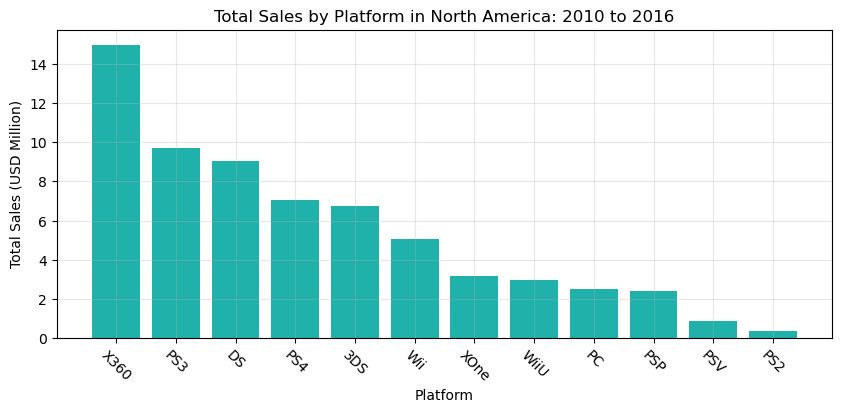

In [72]:
# Top 5 Platforms: North America (NA)
na_sales_yearsort = games[games['year_of_release'] >= 2010]

cats = na_sales_yearsort['platform']
vals = na_sales_yearsort['na_sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cats, vals, color='lightseagreen')
plt.title('Total Sales by Platform in North America: 2010 to 2016')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)
plt.xticks(rotation=-45)

plt.show()

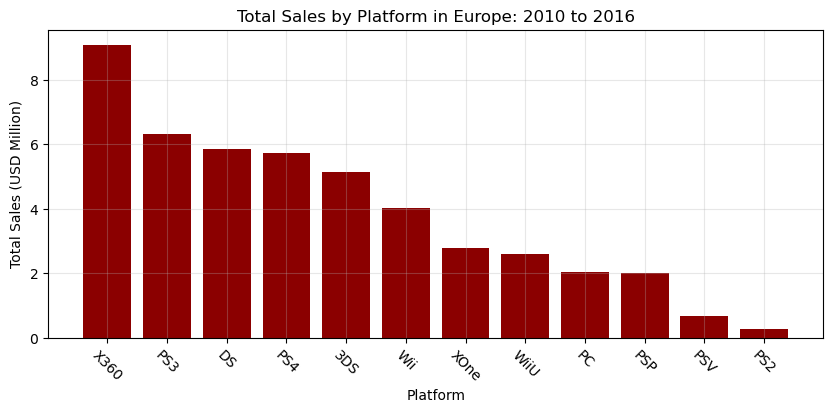

In [73]:
# Top 5 Platforms: Europe (EU)
eu_sales_yearsort = games[games['year_of_release'] >= 2010]

cats = eu_sales_yearsort['platform']
vals = eu_sales_yearsort['eu_sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cats, vals, color='darkred')
plt.title('Total Sales by Platform in Europe: 2010 to 2016')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)
plt.xticks(rotation=-45)

plt.show()

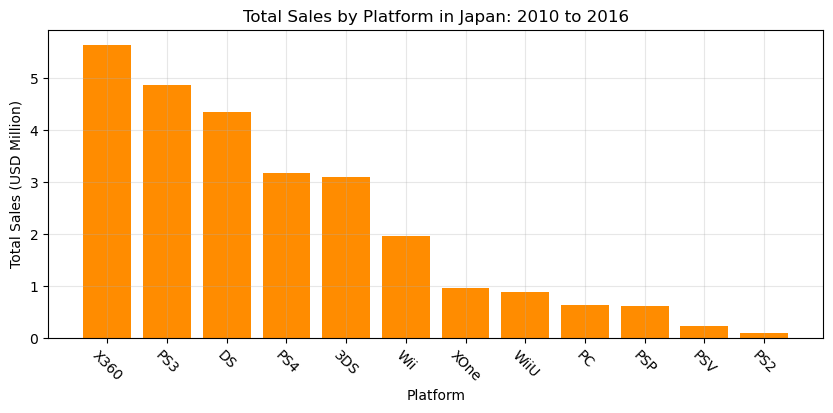

In [74]:
# Top 5 Platforms: Japan (JP)
jp_sales_yearsort = games[games['year_of_release'] >= 2010]

cats = jp_sales_yearsort['platform']
vals = jp_sales_yearsort['jp_sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cats, vals, color='darkorange')
plt.title('Total Sales by Platform in Japan: 2010 to 2016')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)
plt.xticks(rotation=-45)

plt.show()

### Top Five Genres by Region

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The Top 5 Genres for all three regions (North American, Europe, and Japan) are all the same as well:

1. **Misc**
2. **Action**
3. **Role-Playing**
4. **Shooter**
5. **Racing**

These are interesting to be the top five genres seeing as how when looking at total sales we have a different set of top performing genres. Futher research would be diving into the "Misc" category to explore what is making up the majority of sales and moving into this area for future game creation. Games created within the "Action", "Role-Playing", and "Shooter" genres are successful across all three regions; creating a game encompassing all three genres in some way would prove to be successful as well.

</div>

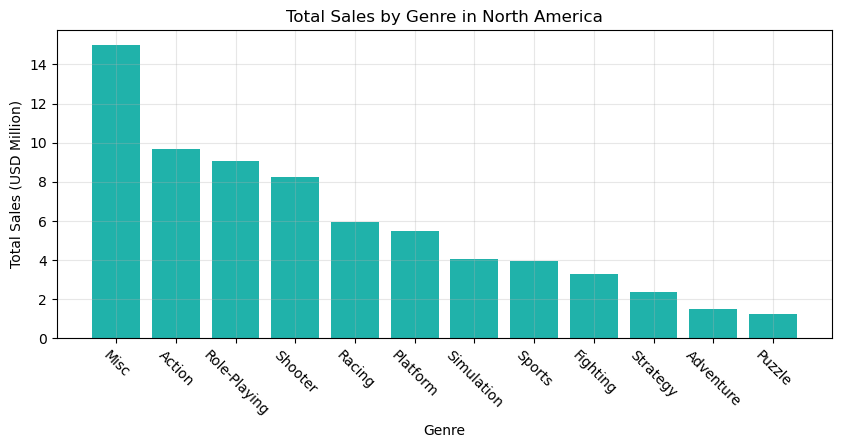

In [77]:
# Top 5 Genres: North America (NA)
na_genre_yearsort = games[games['year_of_release'] >= 2010]

cats = na_genre_yearsort['genre']
vals = na_genre_yearsort['na_sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cats, vals, color='lightseagreen')
plt.title('Total Sales by Genre in North America')
plt.xlabel('Genre')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)
plt.xticks(rotation=-45)

plt.show()

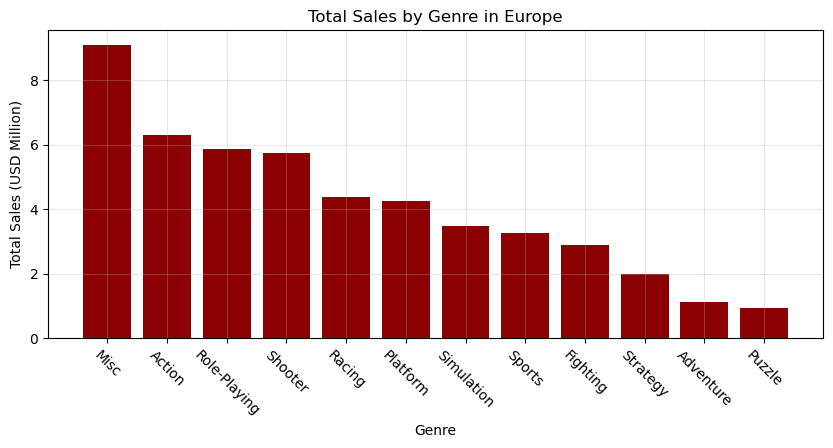

In [78]:
# Top 5 Genres: Europe (EU)
eu_genre_yearsort = games[games['year_of_release'] >= 2010]

cats = eu_genre_yearsort['genre']
vals = eu_genre_yearsort['eu_sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cats, vals, color='darkred')
plt.title('Total Sales by Genre in Europe')
plt.xlabel('Genre')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)
plt.xticks(rotation=-45)

plt.show()

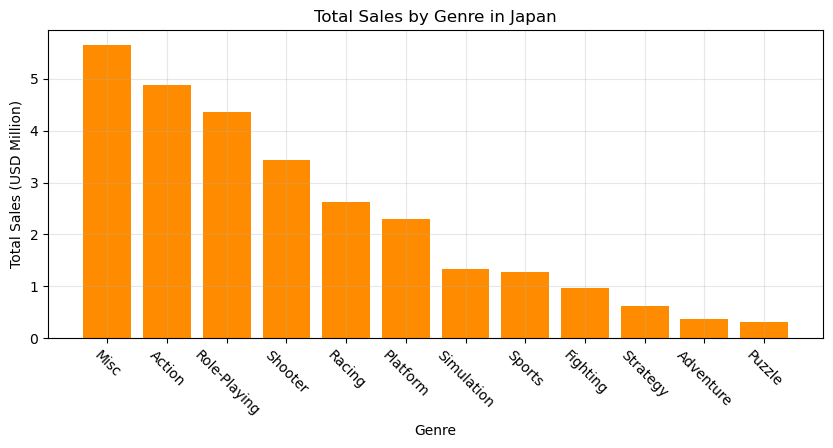

In [79]:
# Top 5 Genres: Japan (JP)
jp_genre_yearsort = games[games['year_of_release'] >= 2010]

cats = jp_genre_yearsort['genre']
vals = jp_genre_yearsort['jp_sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 4))
plt.bar(cats, vals, color='darkorange')
plt.title('Total Sales by Genre in Japan')
plt.xlabel('Genre')
plt.ylabel('Total Sales (USD Million)')
plt.grid(axis='both', alpha=0.3)
plt.xticks(rotation=-45)

plt.show()

### Effect of ESRB Ratings

<div style="border: 2px solid black; padding: 10px; margin: 10px">

From our lineplot below, we see that **"E"** ratings perform better in Europe than in Japan, but it's the opposite for **"NR"** ratings. 

It appears that overall, across all regions, the **"E"** and **"NR"** ratings perform the best. Creating games tailoring to these ratings will prove beneficial for future profitability. We also see a significant performance in sales for the **"M"** ratings in North America as well.

</div>

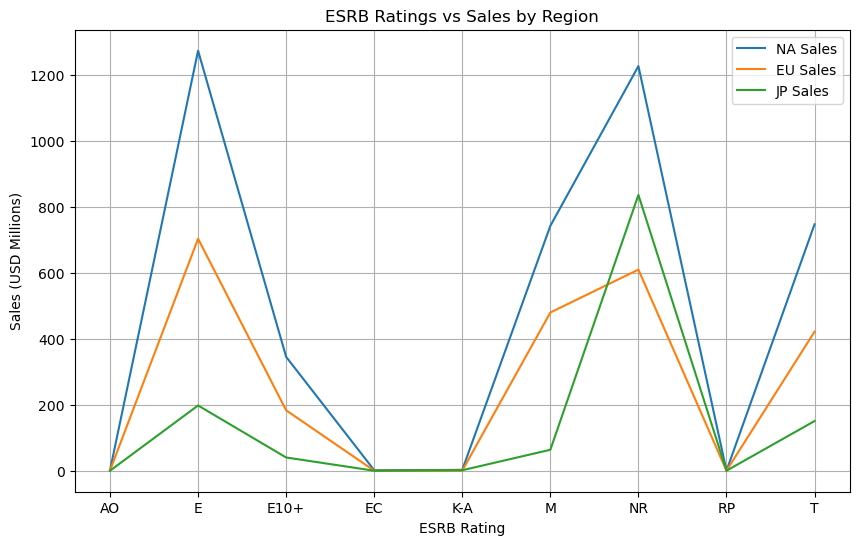

In [82]:
# ESRB Ratings in Relation to Sales Performance from 2010 to 2016

# Creating new dataframes to isolate ratings by region and sales
na_ratings = games.groupby('rating')['na_sales'].sum().reset_index()
eu_ratings = games.groupby('rating')['eu_sales'].sum().reset_index()
jp_ratings = games.groupby('rating')['jp_sales'].sum().reset_index()

# Buidling line plot, starting with data
plt.figure(figsize=(10, 6))

plt.plot(na_ratings['rating'], na_ratings['na_sales'], label='NA Sales')
plt.plot(eu_ratings['rating'], eu_ratings['eu_sales'], label='EU Sales')
plt.plot(jp_ratings['rating'], jp_ratings['jp_sales'], label='JP Sales')

# Adding titles & labels
plt.title('ESRB Ratings vs Sales by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (USD Millions)')
plt.legend()
plt.grid(True)

plt.show()



## Hypothesis Testing

### User Ratings: XboxOne & PC

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<u>**Null Hypothesis:**</u><br>
The average user ratings for the platforms XboxOne & PC **are** the same.

<u>**Alternative Hypothesis:**</u><br>
The average user ratings for the platforms XboxOne & PC are **not** the same.

</div>

In [87]:
# Testing for variance of both populations to formulate code appropriately

xbo_data_plat = games[games['platform'] == 'XOne']['user_score']
pc_data_plat = games[games['platform'] == 'PC']['user_score']

xbo_var_plat = np.var(xbo_data_plat)
pc_var_plat = np.var(pc_data_plat)

print(f"The Variance for User Ratings for the XboxOne platform is {xbo_var_plat}")
print(f"The Variance for User Ratings for the PC platform is {pc_var_plat}")

The Variance for User Ratings for the XboxOne platform is 9.64406136799488
The Variance for User Ratings for the PC platform is 10.165034367018993


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Since the variances are different, we will set the 'equal_var' parameter to 'False'.

</div>

In [89]:
# Testing if the average user ratings for XboxOne & PC are not the same

t_stat_xbo_pc, p_value_xbo_pc = ttest_ind(xbo_data_plat, pc_data_plat, equal_var=False, nan_policy='omit')
alpha = 0.05

# Interpreting results.
if p_value_xbo_pc < alpha:
       print("Reject the Null: The average user ratings for XboxOne and PC are different.")
else:
       print("Fail to reject the Null: No significant difference in average user ratings for Xbox One and PC.")


Reject the Null: The average user ratings for XboxOne and PC are different.


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We **reject** the **Null Hypothesis** here because our p-value between the relationship of user ratings for XboxOnce & PC is less than our alpha which is indicating a less than 5% chance that the alternative hypothesis is incorrect.

I chose the alpha value as 5% as a standard measure of significance between the two datasets. I used the user ratings between all games from all regions to test the significance between the XboxOne and PC platforms.

</div>

### User Ratings: Action & Sports Genres

<div style="border: 2px solid black; padding: 10px; margin: 10px">

<u>**Null Hypothesis:**</u><br>
The average user ratings for the Action & Sports genres **are** the same.

<u>**Alternative Hypothesis:**</u><br>
The average user ratings for the Action & Sports genres are **not** the same.

</div>

In [93]:
# Testing for variance of sets of data to formulate code appropriately

xbo_data_genre = games[games['genre'] == 'Action']['user_score']
pc_data_genre = games[games['genre'] == 'Sports']['user_score']

xbo_var_genre = np.var(xbo_data_genre)
pc_var_genre = np.var(pc_data_genre)

print(f"The Variance for User Ratings for the Action genre is {xbo_var_genre}")
print(f"The Variance for User Ratings for the Sports genre is {pc_var_genre}")

The Variance for User Ratings for the Action genre is 13.462296458319962
The Variance for User Ratings for the Sports genre is 13.261991127260607


<div style="border: 2px solid black; padding: 10px; margin: 10px">

Since the variances are almost equal, we will set the 'equal_var' parameter to 'True'.<br>

This is stating that we believe they are equal in the code.

</div>

In [95]:
# Testing if the average user ratings for Action & Sports genres are not the same

t_stat_genre, p_value_genre = ttest_ind(xbo_data_genre, pc_data_genre, equal_var=True, nan_policy='omit')
alpha = 0.05

# Interpreting results.
if p_value_xbo_pc < alpha:
       print("Reject the Null: The average user ratings for the Action & Sports genres are different.")
else:
       print("Fail to reject the Null: No significant difference in average user ratings the Action & Sports genres.")


Reject the Null: The average user ratings for the Action & Sports genres are different.


<div style="border: 2px solid black; padding: 10px; margin: 10px">

We **reject** the **Null Hypothesis** here because our p-value between the relationship of user ratings for the Action & Sports genres is less than our alpha which is indicating a less than 5% chance that the alternative hypothesis is incorrect.

I chose the alpha value as 5% as a standard measure of significance between the two datasets. I used the user ratings between all games from all regions to test the significance between the Action & Sports genres.

</div>

## Conclusions

<div style="border: 2px solid black; padding: 10px; margin: 10px">

The aim of this anaylsis was to determine specific patterns or tendencies that lead to game success in the marketplace. We've seen a decrease in games being released from early 2000's to about 2009 where the decline begins. Keeping this in mind, it's crucial to get the platform and genre for a new video game right so it can have definite success. <br>

From the period of 2010 to 2016, we see that Xbox360 dominates that timeframe's total sales, but later PS4 rises to the top ranking. We're also seeing that Action and Shooting games are the most popular among all the regions during this timeframe as well as a whole. By region, though, it appears that Role-Playing games are among the highest selling genres as well. It appears that any new ventures in video games should revolve around the genres of Action, Role-Playing and Shooting and should be released on the Platforms for Xbox360 and PS4. These are the parameters are successful sales in these regions are and will produce favorable results.<br>

Ultimately, the data shows that Xbox is the preferred platform and Action is the preferred genre of games to be played leading up into 2016 which gives good indication for new games to be released under similar categories.

</div>